In [299]:
import pandas as pd

In [300]:
df = pd.read_csv("train.csv")

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [301]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [302]:
df_corr = df.copy()
df_corr['Sex'] = df['Sex'].astype('category').cat.codes
df_corr['Embarked'] = df['Embarked'].astype('category').cat.codes
df_corr['Age'] = df['Age'].fillna(df.mean()['Age'])
df_corr['Child'] = [ x <= 15 for x in df['Age']]

corr = df_corr[['Sex', 'Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Child']].corr()[['Survived']]
corr.style.background_gradient()

,Survived
Sex,-0.543351
Age,-0.0698085
Survived,1
Pclass,-0.338481
SibSp,-0.0353225
Parch,0.0816294
Fare,0.257307
Embarked,-0.176509
Child,0.136107


Money is the second that most correlate, what an unfair world!

In [303]:
def get_X(df):
    X = df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']].copy()
    X = X.join(pd.get_dummies(df['Sex']))
    X = X.join(pd.get_dummies(df['Embarked']))
    X['Age'] = df['Age'].fillna(df.mean()['Age'])
    X['Child'] = [ x <= 15 for x in df['Age']]
    
    return X

X = get_X(df)

X

,Age,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,Child
0,22.000000,3,1,0,7.2500,0,1,0,0,1,False
1,38.000000,1,1,0,71.2833,1,0,1,0,0,False
2,26.000000,3,0,0,7.9250,1,0,0,0,1,False
3,35.000000,1,1,0,53.1000,1,0,0,0,1,False
4,35.000000,3,0,0,8.0500,0,1,0,0,1,False
5,29.699118,3,0,0,8.4583,0,1,0,1,0,False
6,54.000000,1,0,0,51.8625,0,1,0,0,1,False
7,2.000000,3,3,1,21.0750,0,1,0,0,1,True
8,27.000000,3,0,2,11.1333,1,0,0,0,1,False
9,14.000000,2,1,0,30.0708,1,0,1,0,0,True


In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       175
          1       0.79      0.73      0.76       120

avg / total       0.81      0.81      0.81       295



Now let's try some grid searching

In [305]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as linear_model
import sklearn.ensemble as ensemble
import sklearn.neural_network as neural_network

def run_grid_search(X, y):
    model = Pipeline(steps=[('clf', LogisticRegression())])

    estimator = GridSearchCV(model, param_grid=[
        {"clf": [
            linear_model.LogisticRegression(),
            linear_model.LogisticRegressionCV(),
            linear_model.Perceptron(max_iter=1000),
            linear_model.RidgeClassifier(),
            linear_model.SGDClassifier(max_iter=1000),
            linear_model.BayesianRidge(),
            linear_model.PassiveAggressiveClassifier(max_iter=1000),
            ensemble.AdaBoostClassifier(),
            ensemble.BaggingClassifier(),
            ensemble.ExtraTreesClassifier(),
            ensemble.GradientBoostingClassifier(),
            ensemble.RandomForestClassifier(),
            ensemble.VotingClassifier(estimators=[
                ("gb", ensemble.GradientBoostingClassifier()),
                ("lr", linear_model.LogisticRegressionCV()),
                ("bc", ensemble.BaggingClassifier()),
                ("rfc", ensemble.RandomForestClassifier())
            ]),
            neural_network.MLPClassifier(hidden_layer_sizes=(200,),activation='tanh')
        ]}
    ])
    estimator.fit(X, y)

    print("Best Score", estimator.best_score_)
    print(type(estimator.best_params_['clf']))
    
    return estimator
    
model = run_grid_search(X, y)

Best Score 0.82379349046
<class 'sklearn.ensemble.voting_classifier.VotingClassifier'>


Just slightly better, let's try some feature engineering

In [306]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    return ''

def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

def feature_engineering(df, X):
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                        'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                        'Don', 'Jonkheer']

    df['Title'] = df['Name'].map(lambda x: substrings_in_string(x, title_list))
    df['Title'] = df.apply(replace_titles, axis=1)

    X = get_X(df).join(pd.get_dummies(df['Title']))
    print(pd.get_dummies(df['Title']).columns)

    cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
    df['Deck'] = df['Cabin'].fillna('Unknown').map(lambda x: "Deck " + substrings_in_string(x, cabin_list))

    X = X.join(pd.get_dummies(df['Deck']))
    print(pd.get_dummies(df['Deck']).columns)
    
    return X

X = feature_engineering(df, X)
model = run_grid_search(X, y)

Index(['Master', 'Miss', 'Mr', 'Mrs'], dtype='object')
Index(['Deck A', 'Deck B', 'Deck C', 'Deck D', 'Deck E', 'Deck F', 'Deck G',
       'Deck T', 'Deck Unknown'],
      dtype='object')
Best Score 0.824915824916
<class 'sklearn.ensemble.voting_classifier.VotingClassifier'>


In [307]:
def feature_engineering2(X):
    X['Family_Size'] = X['SibSp'] + X['Parch']
    X['Age*Class'] = X['Age'] * X['Pclass']
    X['Fare_Per_Person'] = X['Fare']/(X['Family_Size']+1)
    
    return X

X = feature_engineering2(X)
model = run_grid_search(X, y)

Best Score 0.824915824916
<class 'sklearn.ensemble.voting_classifier.VotingClassifier'>


In [308]:
def get_X_test():
    df_test = pd.read_csv("test.csv")
    df_test.set_index('PassengerId', inplace=True)
    
    X_test = get_X(df_test)
    X_test = feature_engineering(df_test, X_test)
    X_test.insert(22, 'Deck T', 0)
    X_test['Fare'] = X_test['Fare'].fillna(X_test.mean()['Fare'])
    X_test = feature_engineering2(X_test)
    
    return df_test, X_test

df_test, X_test = get_X_test()

submit = pd.DataFrame(index=df_test.index.values)
submit.index.name = 'PassengerId'
submit['Survived'] = model.predict(X_test)
submit.to_csv('submission_shallow.csv')

submit.tail()

Index(['Master', 'Miss', 'Mr', 'Mrs'], dtype='object')
Index(['Deck A', 'Deck B', 'Deck C', 'Deck D', 'Deck E', 'Deck F', 'Deck G',
       'Deck Unknown'],
      dtype='object')


,Survived
PassengerId,
1305,0
1306,0
1307,0
1308,0
1309,1


Now let's try with Keras and Deep Learning

In [310]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

y = pd.get_dummies(df['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)

model = Sequential()
model.add(Dense(units=128,
                input_shape=(X.shape[1],),
                activation='relu',
                kernel_initializer='normal',
                bias_initializer='ones'))

# for i in range(0, 15):
model.add(Dense(units=128,
                activation='relu',
                kernel_initializer='normal',
                bias_initializer='zeros'))
model.add(Dropout(.40))
    
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=30, mode='auto', min_delta=0.01, verbose=1)
history = model.fit(X_train, y_train, batch_size=50, epochs=500, verbose=1, callbacks=[early_stop],
                    validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(
    test_loss, test_acc))

Train on 596 samples, validate on 295 samples
Epoch 1/500
596/596 [==============================] - 2s - loss: 0.9742 - acc: 0.5872 - val_loss: 0.6142 - val_acc: 0.7322
Epoch 2/500
596/596 [==============================] - 0s - loss: 0.8316 - acc: 0.6309 - val_loss: 0.6212 - val_acc: 0.7186
Epoch 3/500
596/596 [==============================] - 0s - loss: 0.7268 - acc: 0.6342 - val_loss: 0.5913 - val_acc: 0.7254
Epoch 4/500
596/596 [==============================] - 0s - loss: 0.6453 - acc: 0.6762 - val_loss: 0.6041 - val_acc: 0.7186
Epoch 5/500
596/596 [==============================] - 0s - loss: 0.6177 - acc: 0.6779 - val_loss: 0.5869 - val_acc: 0.7220
Epoch 6/500
596/596 [==============================] - 0s - loss: 0.6116 - acc: 0.7131 - val_loss: 0.5896 - val_acc: 0.7322
Epoch 7/500
596/596 [==============================] - 0s - loss: 0.6341 - acc: 0.6812 - val_loss: 0.5884 - val_acc: 0.7119
Epoch 8/500
596/596 [==============================] - 0s - loss: 0.6163 - acc: 0.6795

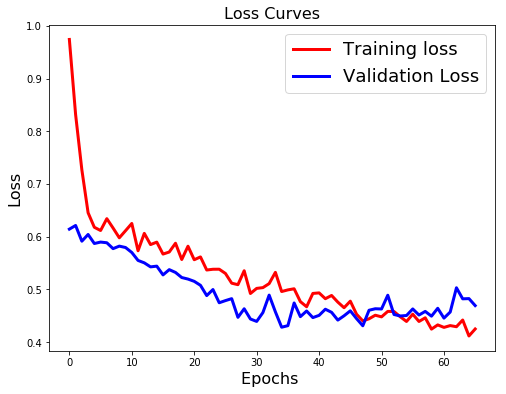

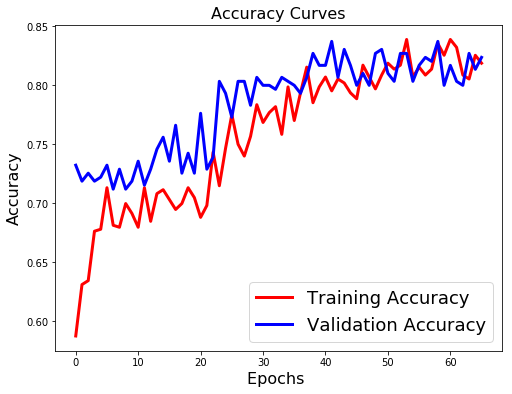

In [347]:
# Plot the Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Plot the Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['acc'], 'r', linewidth=3.0)
plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [431]:
import lime
import lime.lime_tabular

idx = 5

def predict_proba(X):
    return model.predict(X)

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    class_names=["dies", "survives"],
    feature_names=X.columns
)

exp = explainer.explain_instance(X_test[idx], predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=True)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [290]:
df_test, X_test = get_X_test()

submit = pd.DataFrame(index=df_test.index.values)
submit.index.name = 'PassengerId'
submit['Survived'] = np.round(model.predict(X_test.values)[:,1])
submit['Survived'] = submit['Survived'].astype('int')
submit.to_csv('submission_deep.csv')

submit.head()

Index(['Master', 'Miss', 'Mr', 'Mrs'], dtype='object')
Index(['Deck A', 'Deck B', 'Deck C', 'Deck D', 'Deck E', 'Deck F', 'Deck G',
       'Deck Unknown'],
      dtype='object')


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
